In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [6]:
# import keras
# Using TensorFlow backend.
tf.__version__
keras.__version__

'2.9.1'

In [2]:

def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i : (i + window), feature_col_number].values
        target = df.iloc[(i + window), target_col_number]
        #print(features)
        #print("----")
        #print(target)
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).astype(np.float64).reshape(-1, 1)


# In[21]:


gc_df = pd.read_csv('Train.csv', infer_datetime_format=True)


gc_df = gc_df[['SSH','SST','SLP']]
gc_df.columns = ['RTDemand', 'DADemand', 'DALMP']
gc_df.head(3)

,RTDemand,DADemand,DALMP
0,0.72366,3.8342,1.2682
1,0.69412,3.6169,1.2691
2,0.69721,3.0984,1.2674


In [3]:
for c in ['DAEC', 'DACC', 'DAMLC','RTLMP', 'RTEC', 'RTCC', 'RTMLC', 'DryBulb', 'DewPoint', 'ZONE']:
    gc_df[c] = 1

In [4]:
window_size = 72 # 3 days

(X, y) = window_data(gc_df, window_size, 0, 0)


# In[10]:


y.shape


# In[11]:


X.shape


# In[12]:


(dry_bulb, _) = window_data(gc_df, window_size, 10, 1)
(dew_pt, _) = window_data(gc_df, window_size, 11, 1)
(DADemand, _) = window_data(gc_df, window_size, 1, 1)
(DALMP, _) = window_data(gc_df, window_size, 2, 1)
(DAEC, _) = window_data(gc_df, window_size, 3, 1)
(DACC, _) = window_data(gc_df, window_size, 4, 1)
(DAMLC, _) = window_data(gc_df, window_size, 5, 1)
(RTLMP, _) = window_data(gc_df, window_size, 6, 1)
(RTEC, _) = window_data(gc_df, window_size, 7, 1)
(RTCC, _) = window_data(gc_df, window_size, 8, 1)
(RTMLC, _) = window_data(gc_df, window_size, 9, 1)


# In[13]:


dew_pt[0]


# In[14]:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
dry_bulb = scaler.fit_transform(dry_bulb)
dew_pt = scaler.fit_transform(dew_pt)

DADemand = scaler.fit_transform(DADemand)
DALMP = scaler.fit_transform(DALMP)
DAEC = scaler.fit_transform(DAEC)
DACC = scaler.fit_transform(DACC)
DAMLC = scaler.fit_transform(DAMLC)
RTLMP = scaler.fit_transform(RTLMP)
RTEC = scaler.fit_transform(RTEC)
RTCC = scaler.fit_transform(RTCC)
RTMLC = scaler.fit_transform(RTMLC)



# In[15]:


split = int(0.8 * len(X))
X_train = X[: split - 1]
X_test = X[split:]

db_train = dry_bulb[: split - 1]
db_test = dry_bulb[split:]

dew_train = dew_pt[: split - 1]
dew_test = dew_pt[split:]

y_train = y[: split - 1]
y_test = y[split:]

DADemand_train = DADemand[: split - 1]
DALMP_train = DALMP[: split - 1]
DAEC_train = DAEC[: split - 1]
DACC_train = DACC[: split - 1]
DAMLC_train = DAMLC[: split - 1]
RTLMP_train = RTLMP[: split - 1]
RTEC_train = RTEC[: split - 1]
RTCC_train = RTCC[: split - 1]
RTMLC_train = RTMLC[: split - 1]

DADemand_test = DADemand[split:]
DALMP_test = DALMP[split:]
DAEC_test = DAEC[split:]
DACC_test = DACC[split:]
DAMLC_test = DAMLC[split:]
RTLMP_test = RTLMP[split:]
RTEC_test = RTEC[split:]
RTCC_test = RTCC[split:]
RTMLC_test = RTMLC[split:]




X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
db_train = db_train.reshape((db_train.shape[0], db_train.shape[1], 1))
dew_train = dew_train.reshape((dew_train.shape[0], dew_train.shape[1], 1))
DADemand_train = DADemand_train.reshape((DADemand_train.shape[0], DADemand_train.shape[1], 1))
DALMP_train = DALMP_train.reshape((DALMP_train.shape[0], DALMP_train.shape[1], 1))
DAEC_train = DAEC_train.reshape((DAEC_train.shape[0], DAEC_train.shape[1], 1))
DACC_train = DACC_train.reshape((DACC_train.shape[0], DACC_train.shape[1], 1))
DAMLC_train = DAMLC_train.reshape((DAMLC_train.shape[0], DAMLC_train.shape[1], 1))
RTLMP_train = RTLMP_train.reshape((RTLMP_train.shape[0], RTLMP_train.shape[1], 1))
RTEC_train = RTEC_train.reshape((RTEC_train.shape[0], RTEC_train.shape[1], 1))
RTCC_train = RTCC_train.reshape((RTCC_train.shape[0], RTCC_train.shape[1], 1))
RTMLC_train = RTMLC_train.reshape((RTMLC_train.shape[0], RTMLC_train.shape[1], 1))
data_train = np.concatenate((X_train, db_train, dew_train, DADemand_train, DALMP_train, DAEC_train, DACC_train, DAMLC_train, RTLMP_train, RTEC_train, RTCC_train, RTMLC_train), axis=2)
#data_train = np.concatenate((X_train, DADemand_train), axis=2)


X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
db_test = db_test.reshape((db_test.shape[0], db_test.shape[1], 1))
dew_test = dew_test.reshape((dew_test.shape[0], dew_test.shape[1], 1))
DADemand_test = DADemand_test.reshape((DADemand_test.shape[0], DADemand_test.shape[1], 1))
DALMP_test = DALMP_test.reshape((DALMP_test.shape[0], DALMP_test.shape[1], 1))
DAEC_test = DAEC_test.reshape((DAEC_test.shape[0], DAEC_test.shape[1], 1))
DACC_test = DACC_test.reshape((DACC_test.shape[0], DACC_test.shape[1], 1))
DAMLC_test = DAMLC_test.reshape((DAMLC_test.shape[0], DAMLC_test.shape[1], 1))
RTLMP_test = RTLMP_test.reshape((RTLMP_test.shape[0], RTLMP_test.shape[1], 1))
RTEC_test = RTEC_test.reshape((RTEC_test.shape[0], RTEC_test.shape[1], 1))
RTCC_test = RTCC_test.reshape((RTCC_test.shape[0], RTCC_test.shape[1], 1))
RTMLC_test = RTMLC_test.reshape((RTMLC_test.shape[0], RTMLC_test.shape[1], 1))
data_test = np.concatenate((X_test, db_test, dew_test, DADemand_test, DALMP_test, DAEC_test, DACC_test, DAMLC_test, RTLMP_test, RTEC_test, RTCC_test, RTMLC_test), axis=2)
#data_test = np.concatenate((X_test, DADemand_test), axis=2)



# In[16]:


X_train.shape

(816, 72, 1)

## CNN-DT: 
Multivariate One step forward model for spatial forecasting of dynamic topography.\
Here we create a conv2d with a filter shape of 1 timestep by fsize features, basically turning the convolution window on the Z-axis in our slides. 

In [26]:
def basic_conv2D(n_filters=10, fsize=5, window_size=5, n_features=2):
    new_model = keras.Sequential()
    # Hypothetically, we could also tune the padding and activation here.
    new_model.add(tf.keras.layers.Conv2D(n_filters, (1,fsize), padding="same", activation="relu", input_shape=(window_size, n_features, 1)))
    # Flatten will take our convolution filters and lay them out end to end so our dense layer can predict based on the outcomes of each
    new_model.add(tf.keras.layers.Flatten())
    new_model.add(tf.keras.layers.Dense(1000, activation='relu'))
    new_model.add(tf.keras.layers.Dense(100))
    new_model.add(tf.keras.layers.Dense(1))
    new_model.compile(optimizer="adam", loss="mean_squared_error")    
    return new_model

In [27]:
data_train_wide = data_train.reshape((data_train.shape[0], data_train.shape[1], data_train.shape[2], 1))
data_test_wide = data_test.reshape((data_test.shape[0], data_test.shape[1], data_test.shape[2], 1))

In [28]:
data_train_wide.shape

(816, 72, 12, 1)

In [29]:
m2 = basic_conv2D(n_filters=24, fsize=2, window_size=window_size, n_features=data_train_wide.shape[2])

In [30]:
m2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 72, 12, 24)        72        
                                                                 
 flatten_2 (Flatten)         (None, 20736)             0         
                                                                 
 dense_6 (Dense)             (None, 1000)              20737000  
                                                                 
 dense_7 (Dense)             (None, 100)               100100    
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,837,273
Trainable params: 20,837,273
Non-trainable params: 0
_________________________________________________________________


In [31]:
m2_hist = m2.fit(data_train_wide, y_train, epochs=10)

Epoch 1/10
26/26 [==============================] - 2s 60ms/step - loss: 2.9494
Epoch 2/10
26/26 [==============================] - 2s 68ms/step - loss: 0.0239
Epoch 3/10
26/26 [==============================] - 2s 63ms/step - loss: 0.0081
Epoch 4/10
26/26 [==============================] - 1s 56ms/step - loss: 0.0054
Epoch 5/10
26/26 [==============================] - 2s 59ms/step - loss: 0.0023
Epoch 6/10
26/26 [==============================] - 2s 62ms/step - loss: 0.0018
Epoch 7/10
26/26 [==============================] - 2s 65ms/step - loss: 0.0017
Epoch 8/10
26/26 [==============================] - 2s 62ms/step - loss: 0.0013
Epoch 9/10
26/26 [==============================] - 2s 62ms/step - loss: 0.0010
Epoch 10/10
26/26 [==============================] - 2s 63ms/step - loss: 0.0011


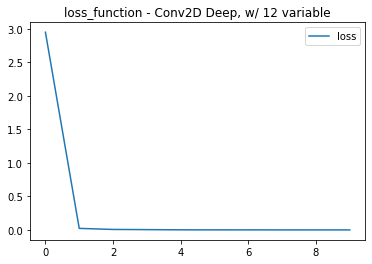

In [32]:
plt.plot(m2_hist.history["loss"])
plt.title("loss_function - Conv2D Deep, w/ 12 variable")
plt.legend(["loss"])
# 
plt.show()

In [33]:
m2.evaluate(data_test_wide, y_test, verbose=0)

0.006051035597920418

In [34]:
from sklearn.metrics import r2_score
predictions = m2.predict(data_test_wide)
test_r2 = r2_score(y_test, predictions)
test_r2

7/7 [==============================] - 0s 7ms/step


0.6682431967300229

In [35]:
conv_acc_df = pd.DataFrame()
conv_acc_df['Actual'] = y_test[:,0]
conv_acc_df['Predict'] = predictions[:,0]
conv_acc_df.head(10)

,Actual,Predict
0,0.31632,0.347009
1,0.28596,0.340672
2,0.25724,0.314681
3,0.21769,0.291391
4,0.21238,0.263150
5,0.19095,0.247338
6,0.17122,0.228650
7,0.16983,0.212986
8,0.18259,0.213712
9,0.18309,0.200181


<AxesSubplot:>

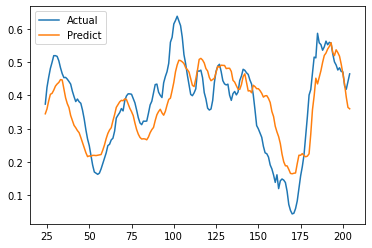

In [36]:
conv_acc_df[24:240].plot()

<AxesSubplot:>

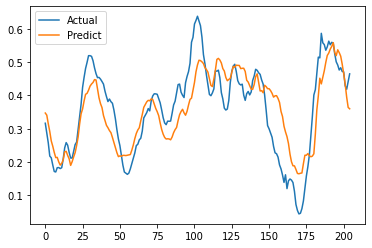

In [38]:
conv_acc_df.plot()

# Deeper CNN2D



I convolved over 2-feature/1-timestep, now I want to convolve over 1-feature/8-timestep, but the 1-feature is actually a 2-feature convolution. 


In [39]:
def deeper_conv2D(n_filters=10, fsize=5, window_size=5, n_features=2, hour_filter=8):
    new_model = keras.Sequential()
    new_model.add(tf.keras.layers.Conv2D(n_filters, (1,fsize), padding="same", activation="linear", input_shape=(window_size, n_features, 1)))
    new_model.add(tf.keras.layers.Conv2D(n_filters, (hour_filter, 1), padding="same", activation="relu"))
    # Flatten will take our convolution filters and lay them out end to end so our dense layer can predict based on the outcomes of each
    new_model.add(tf.keras.layers.Flatten())
    new_model.add(tf.keras.layers.Dense(1000, activation='relu'))
    new_model.add(tf.keras.layers.Dense(100))
    new_model.add(tf.keras.layers.Dense(1))
    new_model.compile(optimizer="adam", loss="mean_squared_error")    
    return new_model

In [40]:
m3 = deeper_conv2D(n_filters=24, fsize=2, window_size=window_size, n_features=data_train_wide.shape[2], hour_filter=8)

In [41]:
m3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 72, 12, 24)        72        
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 12, 24)        4632      
                                                                 
 flatten_3 (Flatten)         (None, 20736)             0         
                                                                 
 dense_9 (Dense)             (None, 1000)              20737000  
                                                                 
 dense_10 (Dense)            (None, 100)               100100    
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 20,841,905
Trainable params: 20,841,905


In [42]:
m3_hist = m3.fit(data_train_wide, y_train, epochs=10)

Epoch 1/10
26/26 [==============================] - 2s 66ms/step - loss: 5.2069
Epoch 2/10
26/26 [==============================] - 2s 63ms/step - loss: 0.0238
Epoch 3/10
26/26 [==============================] - 2s 65ms/step - loss: 0.0102
Epoch 4/10
26/26 [==============================] - 2s 68ms/step - loss: 0.0056
Epoch 5/10
26/26 [==============================] - 2s 67ms/step - loss: 0.0038
Epoch 6/10
26/26 [==============================] - 2s 66ms/step - loss: 0.0028
Epoch 7/10
26/26 [==============================] - 2s 62ms/step - loss: 0.0023
Epoch 8/10
26/26 [==============================] - 2s 65ms/step - loss: 0.0019
Epoch 9/10
26/26 [==============================] - 2s 66ms/step - loss: 0.0016
Epoch 10/10
26/26 [==============================] - 2s 65ms/step - loss: 0.0014


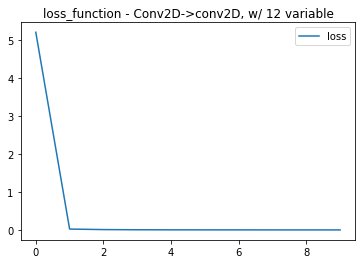

In [43]:
plt.plot(m3_hist.history["loss"])
plt.title("loss_function - Conv2D->conv2D, w/ 12 variable")
plt.legend(["loss"])
# 
plt.show()

In [44]:
m3.evaluate(data_test_wide, y_test, verbose=0)

0.0061592780984938145

In [45]:
from sklearn.metrics import r2_score
predictions = m3.predict(data_test_wide)
test_r2 = r2_score(y_test, predictions)
test_r2

7/7 [==============================] - 0s 9ms/step


0.6623086128264757

In [46]:
conv_acc_df = pd.DataFrame()
conv_acc_df['Actual'] = y_test[:,0]
conv_acc_df['Predict'] = predictions[:,0]
conv_acc_df.head(10)

,Actual,Predict
0,0.31632,0.348842
1,0.28596,0.344143
2,0.25724,0.337536
3,0.21769,0.322444
4,0.21238,0.299644
5,0.19095,0.287491
6,0.17122,0.280791
7,0.16983,0.269628
8,0.18259,0.252155
9,0.18309,0.247478


<AxesSubplot:>

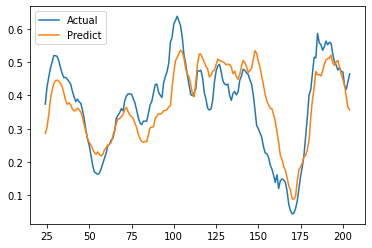

In [47]:
conv_acc_df[24:240].plot()